# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px; padding:20px;"> TP: Mall Customer Segmentation Dataset using Optics Algorithm</p>
   <a id='top'></a>  
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;"></p>   

**L’objectif de ce TP** est d’appliquer l’algorithme OPTICS (Ordering Points To Identify the Clustering Structure)
pour effectuer la segmentation des clients à partir des données du centre commercial. Nous allons explorer les etapes
nécessaires pour charger les données, entrainer le modele OPTICS, visualiser les clusters et interpréter les résultats.

<img src="segmentation.png" alt="Nom de l'image">


### importation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.preprocessing import normalize, StandardScaler

### Loading the Data 



In [2]:
X = pd.read_csv('Mall_Customers.csv')
X.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Data Preprocessing



In [3]:
# Dropping irrelevant columns
drop_features = ['CustomerID', 'Gender']
X = X.drop(drop_features, axis = 1)

In [4]:
# Handling the missing values if any
X.fillna(method ='ffill', inplace = True)

In [5]:
# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalizing the data so that the data
# approximately follows a Gaussian distribution
X_normalized = normalize(X_scaled)

# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

# Renaming the columns
X_normalized.columns = X.columns

X_normalized.head()


,Age,Annual Income (k$),Spending Score (1-100)
0,-0.622173,-0.759499,-0.189897
1,-0.518894,-0.704396,0.484330
2,-0.488556,-0.614244,-0.619691
3,-0.495541,-0.740949,0.453247
4,-0.313049,-0.923896,-0.220036


### Data Exploratory

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

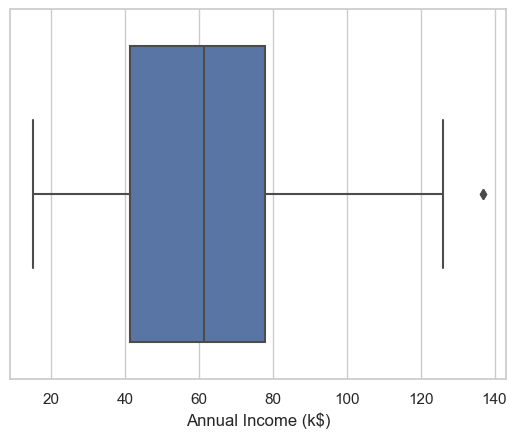

In [6]:
import seaborn as sns 
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=X["Annual Income (k$)"])
X["Annual Income (k$)"].describe()

The spending score values lie within the range [1,100]. It's some sort of metric that tells you how profitable a customer is. The higher it is, the lucrative the costumer is.



count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64


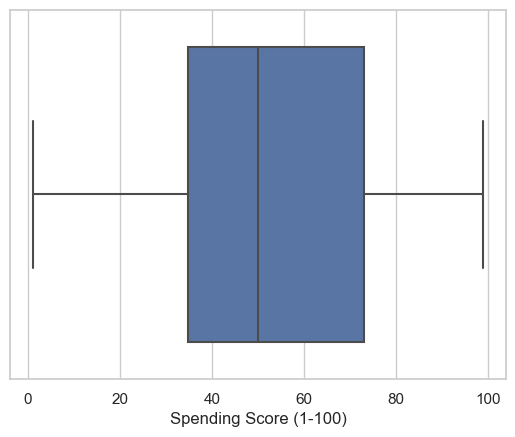

In [7]:
zx = sns.boxplot(x=X["Spending Score (1-100)"])
print(X["Spending Score (1-100)"].describe())

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64


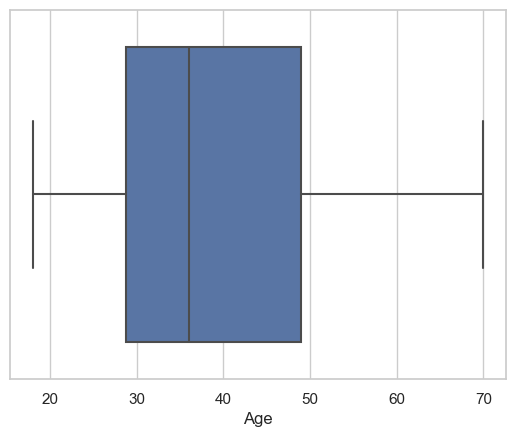

In [8]:
zx = sns.boxplot(x=X["Age"])
print(X["Age"].describe())

50% of the costumers age are below 36 years, which insinuate that the younger generation are most likely to convert to clients. Therefore we will likely target this age range



### Building the Clustering Model 



**The OPTICS algorithms expects two paramters :**

maxeps : a distance that will be used to detect clusters, the algorithm will check each data point maxeps-neighbors, and if there's enough point in this neighborhood, a cluster will be formed minpts : the number of points that should in the maxeps-neighborhood, in order to consider the said points as a cluster.

In [9]:
# Building the OPTICS Clustering model
optics_model = OPTICS(min_samples = 10, xi = 0.05, min_cluster_size = 0.05)

# Training the model
optics_model.fit(X_normalized)

OPTICS(min_cluster_size=0.05, min_samples=10)

###  Storing the results of the training 



In [10]:
# Producing the labels according to the DBSCAN technique with eps = 0.5
label_1 = cluster_optics_dbscan(reachability = optics_model.reachability_,
core_distances = optics_model.core_distances_,
ordering = optics_model.ordering_, eps = 0.5)

# Producing the labels according to the DBSCAN technique with eps = 2.0
label_2 = cluster_optics_dbscan(reachability = optics_model.reachability_,
core_distances = optics_model.core_distances_,
ordering = optics_model.ordering_, eps = 2)

# Creating a numpy array with numbers at equal spaces till
# the specified range
space = np.arange(len(X_normalized))

# Storing the reachability distance of each point
reachability = optics_model.reachability_[optics_model.ordering_]

# Storing the cluster labels of each point
labels = optics_model.labels_[optics_model.ordering_]
print(labels)

[-1 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2  2  2  2  2
  2  2  2  2  2  2  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  3  3  3  3  3  3  3  3  3  3  3  3  3 -1 -1 -1 -1 -1  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5]


In [12]:
print(label_1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [13]:
print(label_2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


###  Visualizing the results 



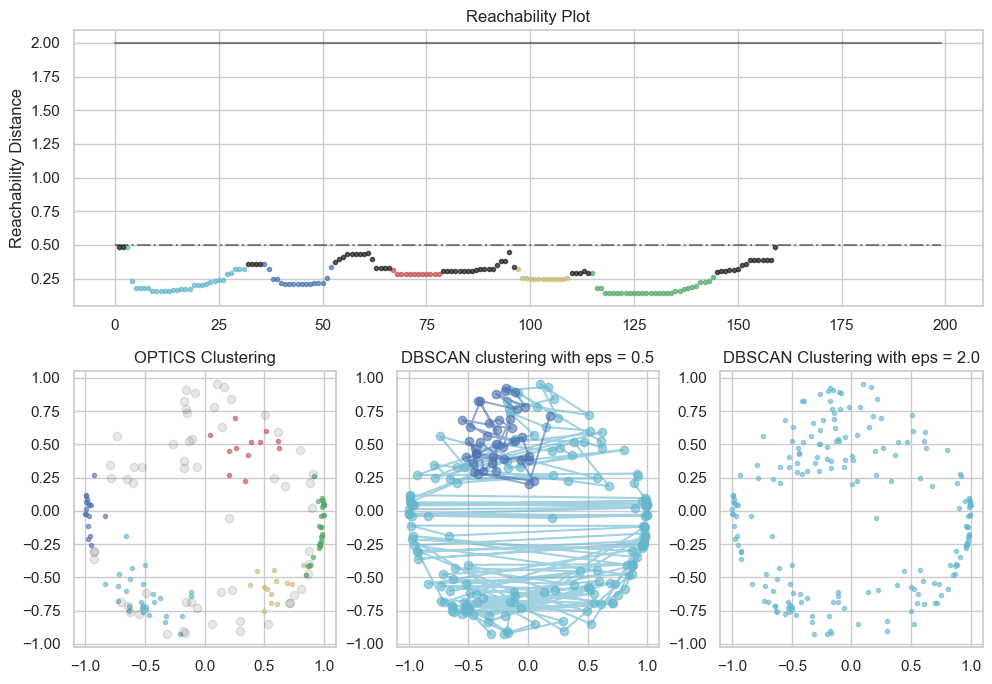

In [11]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

# Defining the framework of the visualization
plt.figure(figsize=(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# Plotting the Reachability-Distance Plot
colors = ['c.', 'b.', 'r.', 'y.', 'g.']
for Class, colour in zip(range(0, 5), colors):
    Xk = space[labels == Class]
    Rk = reachability[labels == Class]
    ax1.plot(Xk, Rk, colour, alpha=0.7)  # Increased alpha value
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.7)  # Increased alpha value
ax1.plot(space, np.full_like(space, 2., dtype=float), 'k-', alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), 'k-.', alpha=0.5)
ax1.set_ylabel('Reachability Distance')
ax1.set_title('Reachability Plot')

# Plotting the OPTICS Clustering
colors = ['c.', 'b.', 'r.', 'y.', 'g.']
for Class, colour in zip(range(0, 5), colors):
    Xk = X_normalized[optics_model.labels_ == Class]
    ax2.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha=0.6)  # Increased alpha value

ax2.plot(X_normalized.iloc[optics_model.labels_ == -1, 0],
         X_normalized.iloc[optics_model.labels_ == -1, 1],
         'ko', alpha=0.1)  # Changed marker to solid marker
ax2.set_title('OPTICS Clustering')

# Plotting the DBSCAN Clustering with eps = 0.5
colors = ['c', 'b', 'r', 'y', 'g', 'greenyellow']
for Class, colour in zip(range(0, 6), colors):
    Xk = X_normalized[labels1 == Class]
    ax3.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha=0.6, marker='o')  # Changed marker to solid marker

ax3.plot(X_normalized.iloc[labels1 == -1, 0],
         X_normalized.iloc[labels1 == -1, 1],
         'ko', alpha=0.1)  # Changed marker to solid marker
ax3.set_title('DBSCAN clustering with eps = 0.5')

# Plotting the DBSCAN Clustering with eps = 2.0
colors = ['c.', 'y.', 'm.', 'g.']
for Class, colour in zip(range(0, 4), colors):
    Xk = X_normalized.iloc[labels2 == Class]
    ax4.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha=0.6)  # Increased alpha value

ax4.plot(X_normalized.iloc[labels2 == -1, 0],
         X_normalized.iloc[labels2 == -1, 1],
         'ko', alpha=0.1)  # Changed marker to solid marker
ax4.set_title('DBSCAN Clustering with eps = 2.0')

plt.tight_layout()
plt.show()


"Optics outperformed DBSCAN , showcasing its superior clustering capability."








**Fin.**